In [3]:
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import numpy as np
import odf
import math
import pdfkit
from scipy.stats import linregress
from scipy.integrate import simps
import scipy.constants as const
from itertools import chain
from statistics import mean
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit, minimize_scalar
from lmfit.models import LorentzianModel
from IPython.display import display, Latex
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(sin(30))

-0.9880316240928618


In [25]:
#Na
ang_right = 68.5 + 9/60 - 60
ang_left = 68.5 + 11/60 - 60
lamda_right = 589 * 10**(-9)
lamda_left = 589.6 * 10**(-9)

def d(lamda, ang, m = 1): 
    diff = np.abs(np.sin(np.deg2rad(ang)) - np.sin(np.deg2rad(60)))
    return (m * lamda)/diff
    
d_right = d(lamda_right, ang_right)
d_left = d(lamda_left, ang_left)
d_avg = np.mean([d_right, d_left])
G = d_avg * 10**9
g = 1/(d_avg * 10**3)

print(G, g)

823.8047148160648 1213.8799184018694


In [42]:
#He
llit = [667.82, 587.56, 501.57, 492.19, 447.15]
ang = np.array([78.5 + 12/60, 75.5 + 1/60, 74.5 + 17/60, 68.5 + 15/60, 63 + 13/60]) - 60
sine = np.sin(np.deg2rad([i for i in ang]))
diff = np.abs(sine - np.sin(np.deg2rad(60)))
wavelength = np.array(d_avg * diff) * 10**9

-823.8047148160646 713.4358107881068


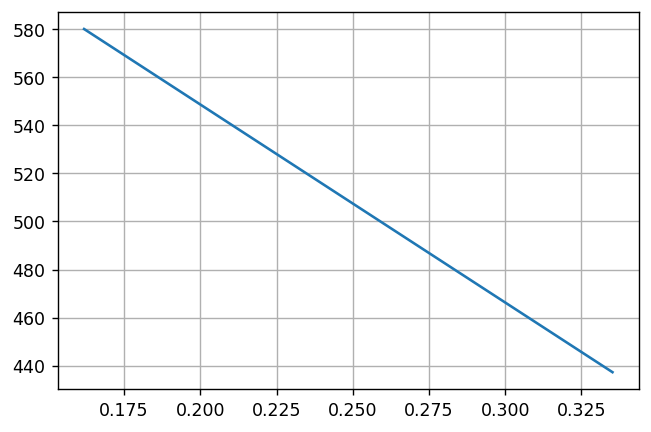

In [51]:
X = np.array(sine).reshape(-1, 1)
Y = np.array(wavelength).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
intercept = reg.intercept_
coef = reg.coef_
reg_value = reg.score(X, Y)
print(coef[0, 0], intercept[0])
plt.figure(dpi=125)
plt.plot(X, Y)
plt.grid()
plt.show()

In [52]:
#Hg
ang = np.array([79.5 + 5/60, 75.5 + 4/60, 71.5 + 10/60, 70 + 1/60, 69 + 19/60]) - 60
llit = [435.8, 546.1, 577, 579.1]
sine = np.sin(np.deg2rad([i for i in ang]))
#diff = np.abs(sine - np.sin(np.deg2rad(60)))
wavelength = np.array(d_avg * diff) * 10**9
wavelength_exp = (coef[0, 0] * sine) + intercept[0]
wavelength_exp

array([437.31498773, 492.3600472 , 546.84802128, 570.14763488,
       580.06934142])

In [53]:
#Zn
ang = np.array([77.5 + 15/60, 77 + 1/60, 76 + 18/60, 71.5 + 11/60, 65 + 23/60]) - 60
# Color: Red, 3 sky blue together, dim green, red
sine = np.sin(np.deg2rad([i for i in ang]))
#diff = np.abs(sine - np.sin(np.deg2rad(60)))
wavelength = np.array(d_avg * diff) * 10**9
wavelength_exp = (coef[0, 0] * sine) + intercept[0]
wavelength_exp

array([462.28716387, 472.34946799, 482.22125269, 546.61334397,
       636.14751342])